<a href="https://colab.research.google.com/github/amankharwal/Website-data/blob/master/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan
!pip install fbprophet

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [4]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2020-01-05   7411.317383
1    2020-01-06   7769.219238
2    2020-01-07   8163.692383
3    2020-01-08   8079.862793
4    2020-01-09   7879.071289
..          ...           ...
362  2021-01-01  29374.152344
363  2021-01-02  32127.267578
364  2021-01-03  32782.023438
365  2021-01-04  31971.914063
366  2021-01-05  30412.328125

[367 rows x 2 columns]


In [6]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-01-05
1   2020-01-06
2   2020-01-07
3   2020-01-08
4   2020-01-09
..         ...
727 2022-01-01
728 2022-01-02
729 2022-01-03
730 2022-01-04
731 2022-01-05

[732 rows x 1 columns]


In [15]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
532,2021-06-20,60046.120095,53460.017937,66761.946357
533,2021-06-21,60305.411485,53468.359351,67313.265336
534,2021-06-22,60490.073268,53780.509267,67551.668680
535,2021-06-23,60695.206921,53679.440158,67497.541611
536,2021-06-24,60880.095468,53822.703581,67700.070379
...,...,...,...,...
727,2022-01-01,99124.827984,76150.105392,121293.814976
728,2022-01-02,99230.058014,76388.011644,121335.816396
729,2022-01-03,99489.349404,76564.660964,121678.282576
730,2022-01-04,99674.011187,76328.038849,121638.721327


In [18]:
import pandas as pd
data = forecast.copy()
data = pd.DataFrame(data)
data.tail(200)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
532,2021-06-20,60089.062345,53460.017937,66761.946357,53486.378237,66669.453700,-42.942250,-42.942250,-42.942250,-42.942250,-42.942250,-42.942250,0.0,0.0,0.0,60046.120095
533,2021-06-21,60288.980395,53468.359351,67313.265336,53619.497879,66926.209667,16.431089,16.431089,16.431089,16.431089,16.431089,16.431089,0.0,0.0,0.0,60305.411485
534,2021-06-22,60488.898446,53780.509267,67551.668680,53734.699263,67177.339092,1.174823,1.174823,1.174823,1.174823,1.174823,1.174823,0.0,0.0,0.0,60490.073268
535,2021-06-23,60688.816496,53679.440158,67497.541611,53873.863336,67428.468517,6.390425,6.390425,6.390425,6.390425,6.390425,6.390425,0.0,0.0,0.0,60695.206921
536,2021-06-24,60888.734547,53822.703581,67700.070379,54019.971840,67675.927656,-8.639079,-8.639079,-8.639079,-8.639079,-8.639079,-8.639079,0.0,0.0,0.0,60880.095468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2022-01-01,99073.082213,76150.105392,121293.814976,76386.756729,121290.276727,51.745771,51.745771,51.745771,51.745771,51.745771,51.745771,0.0,0.0,0.0,99124.827984
728,2022-01-02,99273.000264,76388.011644,121335.816396,76514.097388,121606.919278,-42.942250,-42.942250,-42.942250,-42.942250,-42.942250,-42.942250,0.0,0.0,0.0,99230.058014
729,2022-01-03,99472.918314,76564.660964,121678.282576,76531.091628,121952.133577,16.431089,16.431089,16.431089,16.431089,16.431089,16.431089,0.0,0.0,0.0,99489.349404
730,2022-01-04,99672.836365,76328.038849,121638.721327,76643.830020,122196.696118,1.174823,1.174823,1.174823,1.174823,1.174823,1.174823,0.0,0.0,0.0,99674.011187


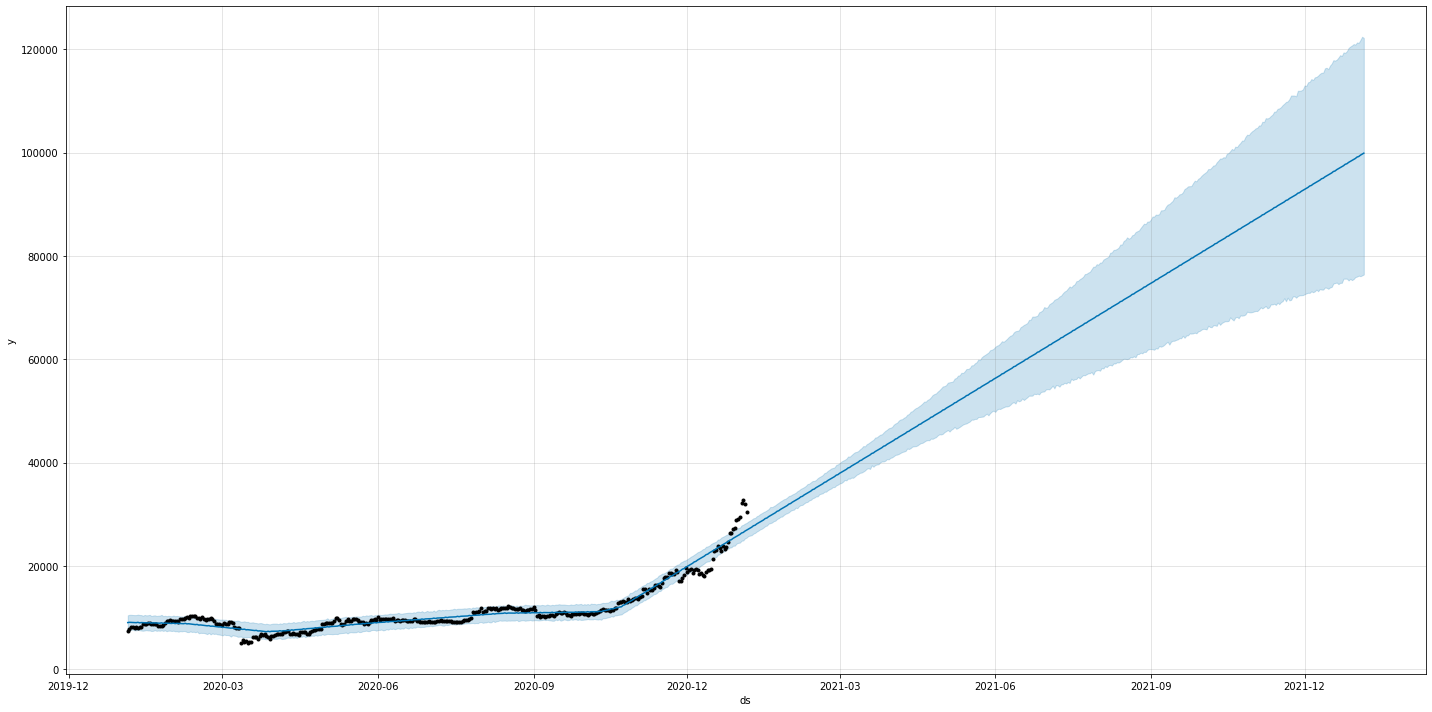

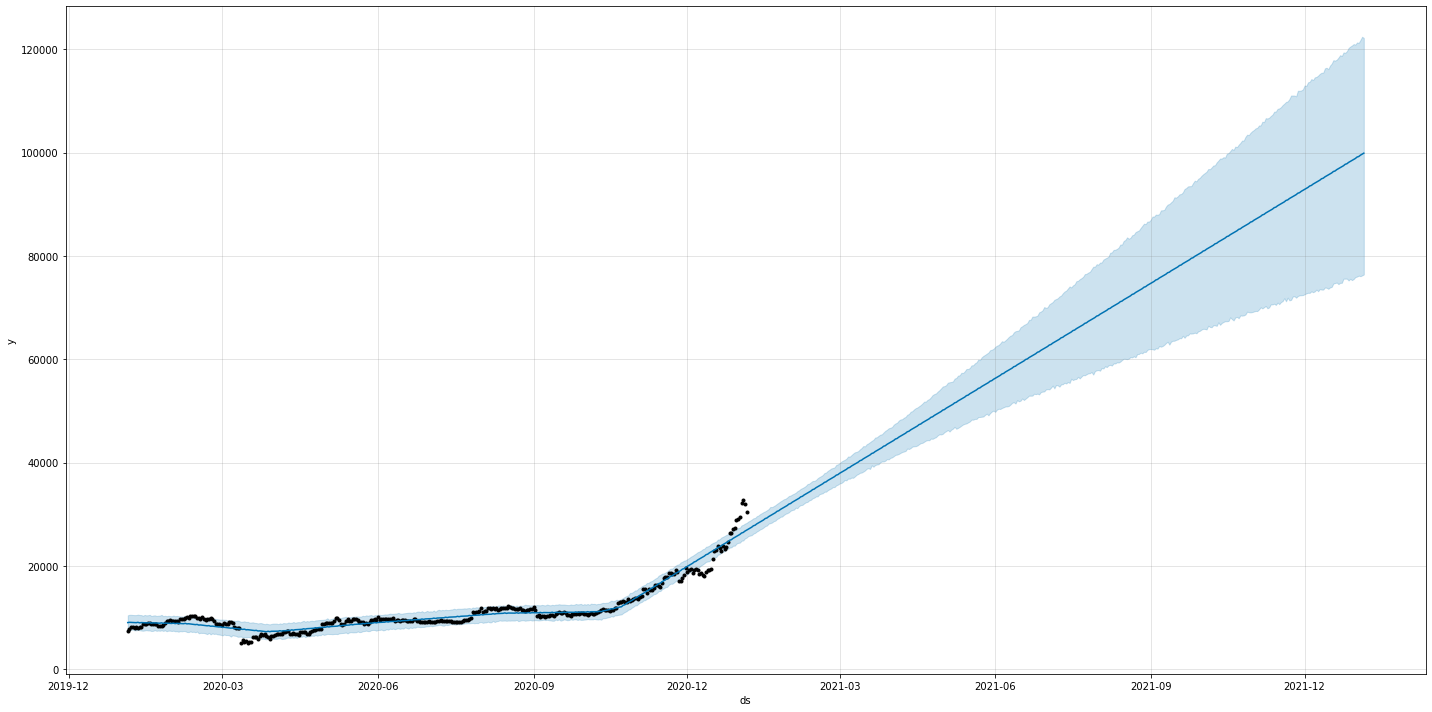

In [10]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))